# Checking Baseline with AutoML

In [1]:
%config InlineBackend.figure_format='retina'
import logging
from ekorpkit import eKonf

logging.basicConfig(level=logging.INFO)
print(eKonf.__version__)
data_dir = "../data/fomc"

0.1.32+8.g4f2aeb9.dirty


## Load a feature set

In [2]:
fs_cfg = eKonf.compose(config_group="dataset=feature")
fs_cfg.name = "fomc_features_small"
fs_cfg.data_dir = data_dir
fs_small = eKonf.instantiate(fs_cfg)

INFO:ekorpkit.datasets.feature:Loaded info file: ../data/fomc/fomc_features_small/info-fomc_features_small.yaml
INFO:ekorpkit.io.file:Processing [1] files from ['../data/fomc/fomc_features_small/fomc_features_small-train.parquet']
INFO:ekorpkit.io.file:Loading 1 dataframes from ['../data/fomc/fomc_features_small/fomc_features_small-train.parquet']
INFO:ekorpkit.io.file:Loading data from ../data/fomc/fomc_features_small/fomc_features_small-train.parquet
INFO:ekorpkit.info.feature:Added a column [split] with value [train]
INFO:ekorpkit.io.file:Processing [1] files from ['../data/fomc/fomc_features_small/fomc_features_small-test.parquet']
INFO:ekorpkit.io.file:Loading 1 dataframes from ['../data/fomc/fomc_features_small/fomc_features_small-test.parquet']
INFO:ekorpkit.io.file:Loading data from ../data/fomc/fomc_features_small/fomc_features_small-test.parquet
INFO:ekorpkit.info.feature:Added a column [split] with value [test]


## Auto ML

In [3]:
model_cfg = eKonf.compose(config_group='model/automl=classification')
model_cfg.dataset = fs_cfg
model_cfg.config.time_budget = 600
model_cfg.verbose = False
model = eKonf.instantiate(model_cfg)

/opt/conda/lib/python3.8/site-packages/xgboost/compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
INFO:ekorpkit.ekonf:No method defined to call


In [4]:
model.fit()

INFO:ekorpkit.datasets.feature:Loaded info file: ../data/fomc/fomc_features_small/info-fomc_features_small.yaml
INFO:ekorpkit.io.file:Processing [1] files from ['../data/fomc/fomc_features_small/fomc_features_small-train.parquet']
INFO:ekorpkit.io.file:Loading 1 dataframes from ['../data/fomc/fomc_features_small/fomc_features_small-train.parquet']
INFO:ekorpkit.io.file:Loading data from ../data/fomc/fomc_features_small/fomc_features_small-train.parquet
INFO:ekorpkit.info.feature:Added a column [split] with value [train]
INFO:ekorpkit.io.file:Processing [1] files from ['../data/fomc/fomc_features_small/fomc_features_small-test.parquet']
INFO:ekorpkit.io.file:Loading 1 dataframes from ['../data/fomc/fomc_features_small/fomc_features_small-test.parquet']
INFO:ekorpkit.io.file:Loading data from ../data/fomc/fomc_features_small/fomc_features_small-test.parquet
INFO:ekorpkit.info.feature:Added a column [split] with value [test]
INFO:flaml.searcher.blendsearch:No low-cost partial config given

Best ML leaner: extra_tree
Best hyperparmeter config: {'n_estimators': 7, 'max_leaves': 24, 'max_features': 0.3361487830842756, 'criterion': 'entropy'}
Best accuracy on validation data: 0.6809
Training duration of best run: 0.268 s


In [5]:
model.best_estimator

ExtraTreesClassifier(criterion='entropy', max_features=0.3361487830842756,
                     max_leaf_nodes=24, n_estimators=7, n_jobs=-1)

In [6]:
model.save()

INFO:ekorpkit.models.automl.flaml:Saved model to /workspace/projects/esgml/outputs/automl_fomc_features_small/automl_fomc_features_small.mdl


In [7]:
model.load()

INFO:ekorpkit.models.automl.flaml:Loaded model from /workspace/projects/esgml/outputs/automl_fomc_features_small/automl_fomc_features_small.mdl


In [8]:
model.show_results()

Best ML leaner: extra_tree
Best hyperparmeter config: {'n_estimators': 7, 'max_leaves': 24, 'max_features': 0.3361487830842756, 'criterion': 'entropy'}
Best accuracy on validation data: 0.6809
Training duration of best run: 0.268 s


In [9]:
model.get_logs()

{'time_history': [0.5698027610778809, 47.84880495071411],
 'best_valid_loss_history': [0.33731343283582094, 0.3282225237449118],
 'valid_loss_history': [0.33731343283582094, 0.3282225237449118],
 'config_history': [{'Current Learner': 'lgbm',
   'Current Sample': 332,
   'Current Hyper-parameters': {'n_estimators': 4,
    'num_leaves': 4,
    'min_child_samples': 20,
    'learning_rate': 0.09999999999999995,
    'log_max_bin': 8,
    'colsample_bytree': 1.0,
    'reg_alpha': 0.0009765625,
    'reg_lambda': 1.0},
   'Best Learner': 'lgbm',
   'Best Hyper-parameters': {'n_estimators': 4,
    'num_leaves': 4,
    'min_child_samples': 20,
    'learning_rate': 0.09999999999999995,
    'log_max_bin': 8,
    'colsample_bytree': 1.0,
    'reg_alpha': 0.0009765625,
    'reg_lambda': 1.0}},
  {'Current Learner': 'extra',
   'Current Sample': 332,
   'Current Hyper-parameters': {'n_estimators': 4,
    'max_features': 0.2258306801933513,
    'max_leaves': 6,
    'criterion': 'gini'},
   'Best Lear

INFO:ekorpkit.visualize.plot:Plotting barplot with {'x': 'importances', 'y': 'columns', 'hue': None}
INFO:ekorpkit.visualize.base:Saved figure to ./figs/fig_BarPlot.png


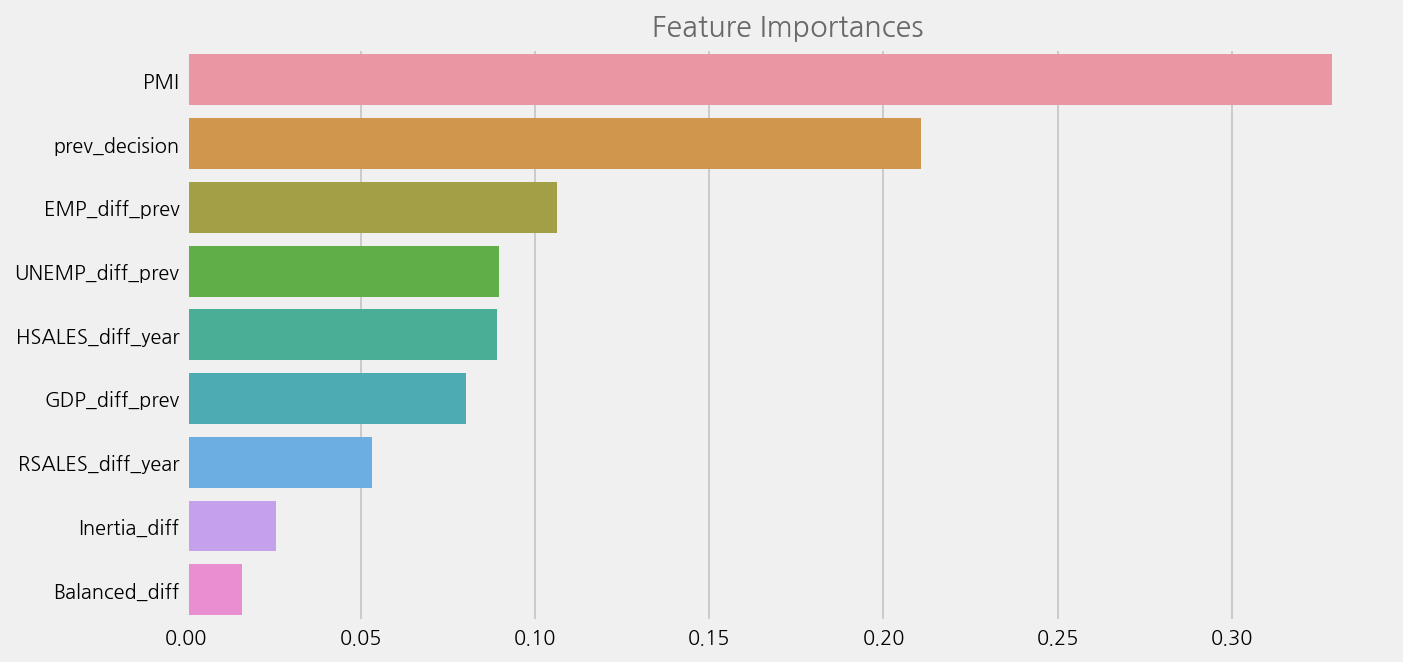

In [10]:
model.plot_feature_importance()